In [1]:
import tensorflow as tf
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

INFO:tensorflow:Enabling eager execution
INFO:tensorflow:Enabling v2 tensorshape
INFO:tensorflow:Enabling resource variables
INFO:tensorflow:Enabling tensor equality
INFO:tensorflow:Enabling control flow v2


In [2]:
Datadirectory = "Dataset/train/"

In [3]:
Classes = ["anger", "disgust", "fear", "happiness", "neutral", "sadness", "surprise"]

In [4]:
training_Data = []

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (224,224))
                training_Data.append([new_array, class_num])
            except Exception as e:
                pass


In [5]:
create_training_Data()

In [6]:
print(len(training_Data))

32298


In [7]:
#temp = np.array(training_Data)

In [8]:
import random

random.shuffle(training_Data)

In [9]:
x = []
y = []

for features, label in training_Data:
    x.append(features)
    y.append(label)
    
X = np.array(x).reshape(-1,224,224,3)

In [10]:
X.shape

(32298, 224, 224, 3)

In [14]:
#X = round(X/255.0,4);

In [15]:
Y = np.array(y)

In [16]:
Y.shape

(32298,)

In [17]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [18]:
model = tf.keras.applications.MobileNetV2()

In [19]:
#model.summary()

In [20]:
base_input = model.layers[0].input

In [21]:
base_output = model.layers[-2].output

In [25]:
#base_output

In [23]:
final_output = layers.Dense(128)(base_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(64)(final_output)
final_output = layers.Activation('relu')(final_output)
final_output = layers.Dense(7,activation='softmax')(final_output)

In [26]:
#final_output

In [27]:
new_model = keras.Model(inputs = base_input, outputs = final_output)

In [28]:
new_model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, 112, 112, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, 112, 112, 32) 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, 112, 112, 32) 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [29]:
new_model.compile(loss="sparse_categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [30]:
new_model.fit(X,Y, epochs=15)

Epoch 1/15
1010/1010 [==============================] - 574s 525ms/step - loss: 1.3626 - accuracy: 0.4782
Epoch 2/15
1010/1010 [==============================] - 472s 467ms/step - loss: 1.0571 - accuracy: 0.6023
Epoch 3/15
1010/1010 [==============================] - 448s 444ms/step - loss: 0.9816 - accuracy: 0.6388
Epoch 4/15
1010/1010 [==============================] - 445s 441ms/step - loss: 0.9261 - accuracy: 0.6587
Epoch 5/15
1010/1010 [==============================] - 445s 440ms/step - loss: 0.8680 - accuracy: 0.6814
Epoch 6/15
1010/1010 [==============================] - 444s 439ms/step - loss: 0.8008 - accuracy: 0.7027
Epoch 7/15
1010/1010 [==============================] - 444s 440ms/step - loss: 0.7521 - accuracy: 0.7212
Epoch 8/15
1010/1010 [==============================] - 445s 440ms/step - loss: 0.6976 - accuracy: 0.7433
Epoch 9/15
1010/1010 [==============================] - 445s 441ms/step - loss: 0.6576 - accuracy: 0.7577
Epoch 10/15
1010/1010 [=======================

In [31]:
new_model.save('mobnet_model2.h5')

c:\users\vardaan\appdata\local\programs\python\python39\lib\site-packages\tensorflow\python\keras\utils\generic_utils.py:494: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  warnings.warn('Custom mask layers require a config and must override '


In [42]:
Testdatadirectory = "Dataset/test/"

In [43]:
testing_Data = []

def create_testing_Data():
    for category in Classes:
        path = os.path.join(Testdatadirectory, category)
        class_num = Classes.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (224,224))
                testing_Data.append([new_array, class_num])
            except Exception as e:
                pass


In [44]:
create_testing_Data()

In [45]:
print(len(testing_Data))

3589


In [46]:
a = []
b = []

for features, label in testing_Data:
    a.append(features)
    b.append(label)

In [48]:
print(len(a))
print(len(b))

3589
3589


In [50]:
A = np.array(a).reshape(-1,224,224,3)

In [52]:
B = np.array(b)

In [53]:
#accs = new_model.evaluate(A, B, verbose=0)

In [55]:
#print(accs)

In [58]:
frame = cv2.imread('index.jpg')

In [59]:
frame.shape

(183, 276, 3)

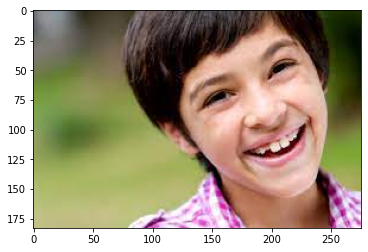

In [61]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [88]:
faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [89]:
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

In [90]:
gray.shape

(183, 276)

In [105]:
faces = faceCascade.detectMultiScale(gray,1.1,4)
for x,y,w,h in faces:
    print(x,y,w,h)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = frame[y:y+h, x:x+w]
    cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
    facess = faceCascade.detectMultiScale(roi_gray)
    print(facess)
    if len(facess)==0:
        print("Face not Detected")
    else:
        for (ex,ey,ew,eh) in facess:
            face_roi = roi_color[ey: ey+eh, ex: ex+ew]


114 5 149 149
()
Face not Detected


In [92]:
print(faces)

[[114   5 149 149]]


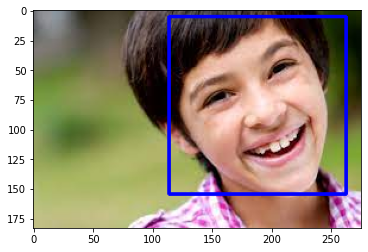

In [93]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

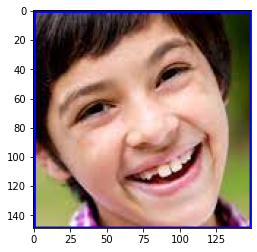

In [107]:
plt.imshow(cv2.cvtColor(roi_color, cv2.COLOR_BGR2RGB))

In [113]:
final_image = cv2.resize(roi_color, (224,224))
final_image = np.expand_dims(final_image,axis=0)

In [109]:
Predictions = new_model.predict(final_image)

In [110]:
Predictions[0]

array([4.1645553e-06, 3.2808703e-08, 2.7834740e-05, 9.9973935e-01,
       2.0527269e-04, 1.8396428e-05, 4.9289906e-06], dtype=float32)

In [111]:
np.argmax(Predictions)

3

In [1]:
import cv2
path = "haarcascade_frontalface_deffault.xml"
font_scale = 1.5
font = cv2.FONT_HERSHEY_PLAIN

rectangle_bgr = (255,255,255)
img = np.zeros((500,500))
text = "No Text"
(text_width, text_height) = cv2.getTextSize(text, font, fontScale=font_scale, thickness=1)[0]

text_offset_x = 10
text_offset_y = img.shape[0] -25


box_coords = ((text_offset_x, text_offset_y), (text_offset_x+text_width+2, text_offset_y-text_height-2))
cv2.rectangle(img, box_coords[0], box_coords[1], rectangle_bgr, cv2.FILLED)
cv2.putText(img,text, (text_offset_x, text_offset_y), font, fontScale=font_scale, color=(0,0,0), thickness=1)

cap = cv2.VideoCapture(1)
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open Webcam")

while True:
    ret,frame = cap.read()
    faceCascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
    gray = cv2.cvtColor(frame,cv2.COLOR_BGR2GRAY)
    faces = faceCascade.detectMultiScale(gray,1.1,4)
    for x,y,w,h in faces:
        #print(x,y,w,h)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        cv2.rectangle(frame, (x,y), (x+w,y+h), (255,0,0), 2)
        #for (ex,ey,ew,eh) in facess:
        #    face_roi = roi_color[ey: ey+eh, ex: ex+ew]
    final_image = cv2.resize(roi_color, (224,224))
    final_image = np.expand_dims(final_image,axis=0)
    
    font = cv2.FONT_HERSHEY_SIMPLEX
    
    Predictions = new_model.predict(final_image)
    
    font_scale = 1.5
    font = cv2.FONT_HERSHEY_PLAIN
    
    if(np.argmax(Predictions)==0):
        status = "Angry"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif(np.argmax(Predictions)==1):
        status = "Disgust"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif(np.argmax(Predictions)==2):
        status = "Fear"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif(np.argmax(Predictions)==3):
        status = "Happy"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif(np.argmax(Predictions)==4):
        status = "Sad"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    elif(np.argmax(Predictions)==5):
        status = "Surprise"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
    else:
        status = "Neutral"
        x1,y1,w1,h1 = 0,0,175,75
        cv2.rectangle(frame, (x1,x1), (x1+w1,y1+h1), (0,0,0), -1)
        cv2.putText(frame, status, (x1+int(w1/10),y1 + int(h1/2)), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0,0,255), 2)
        cv2.putText(frame, status, (100,150), font, 3, (0,0,255), 2, cv2.LINE_4)
        cv2.rectangle(frame, (x,y), (x+w,y+h), (0,0,255))
        

    cv2.imshow('Emotion Detection', frame)
    
    if cv2.waitKey(2) & 0xFF ==ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
    

NameError: name 'np' is not defined